In [1]:
# imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.io as sio
import networkx as nx
from google.colab import drive

# 2(a)

In [2]:
# C set
colors = {1:"red", 2:"green"}

# V set
N_nodes = 10
nodes = list(range(N_nodes)) # 1 to 10

# Adjacency matrix W of line graph
W = np.eye(N_nodes, k=1) + np.eye(N_nodes, k=-1)

# cost function
def cost_function_c(s, x):
  return 1 if s==x else 0

# potential function
def potential_function_U(G, c):
  sum = 0
  for node_i in G.nodes():
    for neighbor in G.neighbors(node_i):
      sum += c(G.nodes()[node_i]["color"], G.nodes()[neighbor]["color"])
  return sum/2

# random choice of color update
def choose_new_color(G, node_i, eta, c, color_set):
  # calculate distribution
  prob_dist = []
  for s in color_set:
    new_cost = 0
    for neighbor in G.neighbors(node_i):
      new_cost += c(s, G.nodes()[neighbor]["color"])
    prob_dist.append(np.exp(-eta*new_cost))

  # normalize to sum = 1
  prob_dist /= np.sum(prob_dist)

  # choose the new color
  next_color = np.random.choice(color_set, p=prob_dist)
  return next_color


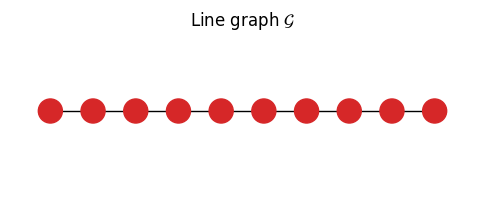

In [3]:
# create G
G = nx.Graph()
[G.add_node(n, color="red") for n in nodes]
[G.add_edge(n1, n2) if W[n1][n2]==1 else None for n1 in nodes for n2 in nodes]

# plot initial state, all nodes at same frequency band
pos = [(p, 0) for p in nodes]
cc = ["tab:"+attr["color"] for n, attr in G.nodes().items()]
fig, ax = plt.subplots(figsize=(6, 2))
nx.draw(G, pos=pos, node_color=cc)
plt.title("Line graph $\mathcal{G}$")
# fig.savefig('ex2_initial_line_G.svg', format='svg', dpi=1200)
plt.show()

In [4]:
def eta_t_over_100(t):
  # eta = t/100
  return t/100

def simulate_coloring_graph(G, color_set, eta, c, sim_time=1000):
  # initial state
  [G.add_node(n, color=1) for n in G.nodes()]
  node_colors = [attr["color"] for n, attr in G.nodes().items()]
  potential_in_time = [potential_function_U(G, c)]

  # initialize information
  t = 1
  u = min_u = potential_in_time[0]
  min_t = 0
  min_colors = node_colors

  # iterate through the time steps
  while t < sim_time and u != 0:
    # choose random node to wake up
    node = np.random.choice(G.nodes())

    # choose the next color for the node
    new_color = choose_new_color(G, node, eta(t), c, color_set)

    # update color
    node_colors[node] = new_color
    G.add_node(node, color=new_color)

    # compute the potential U(t)
    u = potential_function_U(G, c)
    potential_in_time.append(u)

    # if current U(t) is less than previous U(t_min), update min
    if u < min_u:
      min_u = u
      min_t = t
      min_colors = node_colors.copy()
      min_G = G.copy()
      print(f"New min potential at time {t:6}: {min_u}")

    t += 1

  return potential_in_time, min_u, min_t, min_colors, min_G

New min potential at time      1: 8.0
New min potential at time      3: 6.0
New min potential at time      4: 4.0
New min potential at time     37: 2.0
New min potential at time     43: 1.0
New min potential at time    114: 0.0

Potential in time


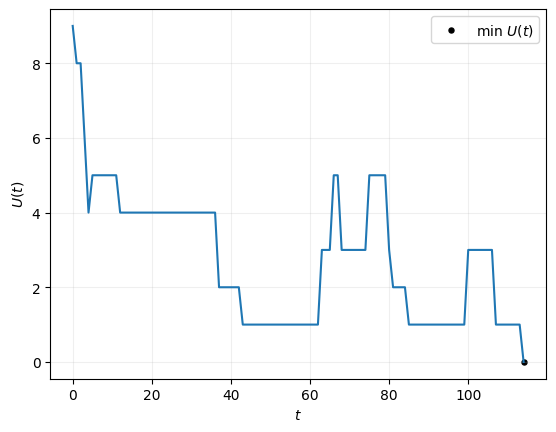


Solution


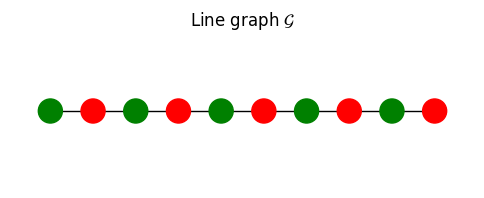

In [5]:
# simulate logit dynamics on G
potential_in_time, min_u, min_t, min_colors, min_G = simulate_coloring_graph(G, list(colors.keys()), eta_t_over_100, cost_function_c, 1000)

# Results:
# plot potential in time
print("\nPotential in time")
plt.plot(potential_in_time)
plt.scatter(min_t, min_u, c="black", s=13, label="min $U(t)$")
plt.legend()
plt.grid(alpha=0.2)
plt.ylabel("$U(t)$")
plt.xlabel("$t$")
# plt.savefig('ex2_potential_line_G.svg', format='svg', dpi=1200)
plt.show()

# plot result
print("\nSolution")
pos = [(p, 0) for p in nodes]
cc = [colors[c] for c in min_colors]
fig, ax = plt.subplots(figsize=(6, 2))
nx.draw(G, pos=pos, node_color=cc)
plt.title("Line graph $\mathcal{G}$")
# fig.savefig('ex2_final_line_G.svg', format='svg', dpi=1200)
plt.show()

# 2(b)

In [6]:
# Get file location to study wifi network
# login to drive
drive.mount('/content/drive')

# Gustavo
wifi_file_loc  = "/content/drive/MyDrive/Network Dynamics and Learning/HW3/wifi.mat"
coord_file_loc = "/content/drive/MyDrive/Network Dynamics and Learning/HW3/coords.mat"

# Claudio
wifi_file_loc  = "/content/drive/MyDrive/Network Dynamics and Learning/HW3/wifi.mat"
coord_file_loc = "/content/drive/MyDrive/Network Dynamics and Learning/HW3/coords.mat"

Mounted at /content/drive


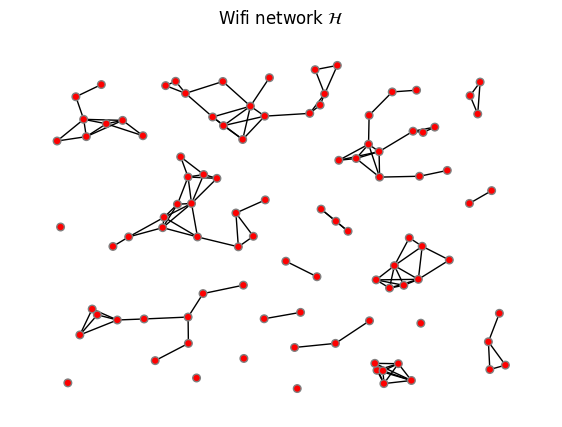

In [7]:
# read files

# wifi = W = adjacency matrix
wifi = np.array(sio.loadmat(wifi_file_loc)["wifi"])
# coordinates of the routers
coord = np.array(sio.loadmat(coord_file_loc)["coords"])

# create network N
N_routers = len(wifi)
routers = list(range(len(wifi)))

# create network
network = nx.Graph()
[network.add_node(r, color=1) for r in routers] # all red
[network.add_edge(r1, r2) if wifi[r1][r2]==1 else None for r1 in routers for r2 in routers]

# C set
C = {1:"red", 2:"green", 3:"blue", 4:"yellow", 5:"magenta", 6:"cyan", 7:"white", 8:"black"}

# plot initial state, all nodes at same frequency band
cc = [C[attr["color"]] for n, attr in network.nodes().items()]
fig, ax = plt.subplots(figsize=(7,5))
nx.draw(network, pos=coord, node_size=30, node_color=cc, linewidths=1, edgecolors="grey")
plt.title("Wifi network $\mathcal{H}$")
fig.savefig('ex2_initial_network_N.svg', format='svg', dpi=1200)
plt.show()

# cost function for wifi routers
def cost_function_wifi(s, color):
  if color == s:
    return 2
  elif np.abs(color - s) == 1:
    return 1
  else:
    return 0

In [8]:
def plot_network_results(n, potential_in_time, min_t, min_u, min_net):

  # plot potential in time
  print(f"\nPotential in time of run #{n}")
  plt.plot(potential_in_time)
  plt.scatter(min_t, min_u, c="black", s=13, label="min $U(t)$")
  plt.legend()
  plt.grid(alpha=0.2)
  plt.ylabel("$U(t)$")
  plt.xlabel("$t$")
  plt.savefig(f'ex2_potential_H{n}.svg', format='svg', dpi=1200)
  plt.show()

  # plot network
  print(f"\nSolution of run #{n}")
  cc = [C[c] for c in min_colors]
  edge_color_map = {0:"black", 1:"blue", 2:"red"}
  edge_colors = [edge_color_map[cost_function_wifi(min_net.nodes()[i]["color"], min_net.nodes()[j]["color"])] for i, j in min_net.edges()]
  fig, ax = plt.subplots(figsize=(7,5))
  nx.draw(min_net, pos=coord, node_size=30, node_color=cc, linewidths=1, edgecolors="grey")
  nx.draw_networkx_edges(min_net, pos=coord, edge_color=edge_colors)
  plt.title("Wifi network $\mathcal{H}$")
  fig.savefig(f'ex2_network_H{n}.svg', format='svg', dpi=1200)
  plt.show()

---------------- Run #1 ----------------
New min potential at time      1: 266.0
New min potential at time      3: 262.0
New min potential at time      4: 252.0
New min potential at time      5: 244.0
New min potential at time      6: 238.0
New min potential at time      7: 236.0
New min potential at time      8: 231.0
New min potential at time      9: 229.0
New min potential at time     11: 228.0
New min potential at time     12: 226.0
New min potential at time     13: 218.0
New min potential at time     14: 216.0
New min potential at time     20: 208.0
New min potential at time     21: 202.0
New min potential at time     22: 200.0
New min potential at time     25: 188.0
New min potential at time     26: 183.0
New min potential at time     27: 179.0
New min potential at time     29: 175.0
New min potential at time     30: 174.0
New min potential at time     31: 173.0
New min potential at time     32: 167.0
New min potential at time     33: 163.0
New min potential at time     34: 160.0

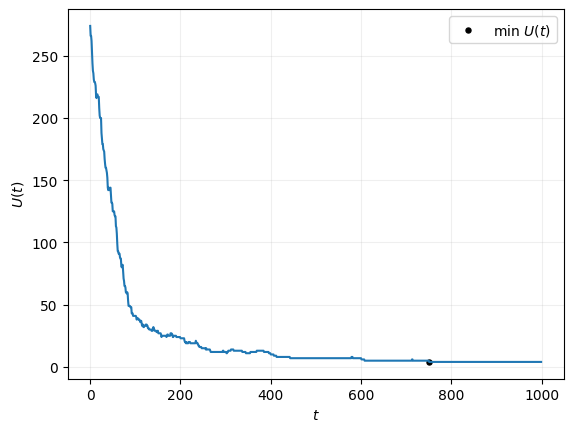


Solution of run #1


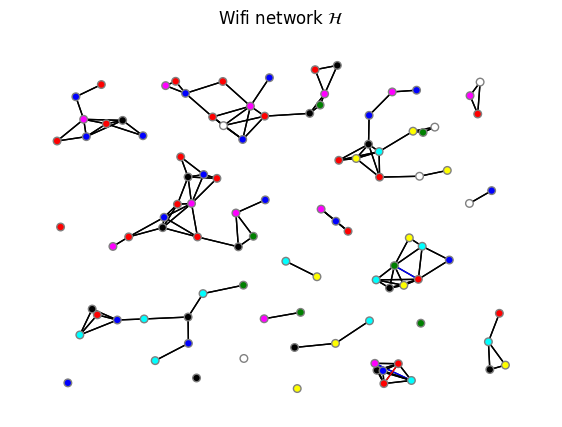

---------------- Run #2 ----------------
New min potential at time      1: 272.0
New min potential at time      2: 270.0
New min potential at time      3: 262.0
New min potential at time      4: 257.0
New min potential at time      5: 253.0
New min potential at time      7: 244.0
New min potential at time      8: 242.0
New min potential at time      9: 241.0
New min potential at time     12: 233.0
New min potential at time     13: 227.0
New min potential at time     14: 223.0
New min potential at time     16: 219.0
New min potential at time     18: 215.0
New min potential at time     20: 207.0
New min potential at time     22: 206.0
New min potential at time     23: 202.0
New min potential at time     24: 194.0
New min potential at time     25: 190.0
New min potential at time     26: 188.0
New min potential at time     27: 186.0
New min potential at time     28: 182.0
New min potential at time     32: 179.0
New min potential at time     33: 177.0
New min potential at time     35: 176.0

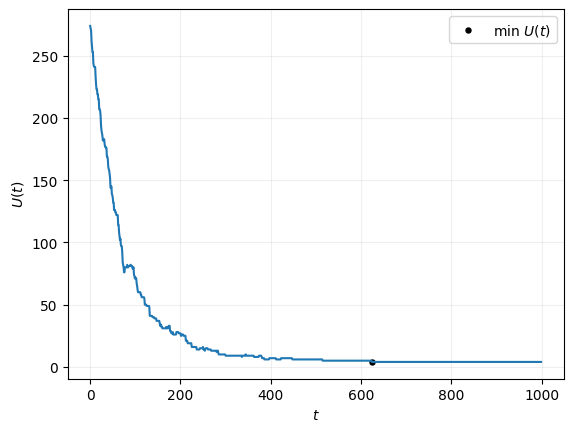


Solution of run #2


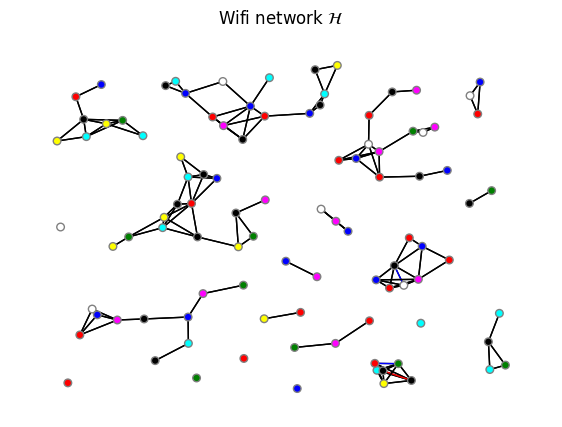

---------------- Run #3 ----------------
New min potential at time      1: 266.0
New min potential at time      2: 264.0
New min potential at time      3: 260.0
New min potential at time      4: 253.0
New min potential at time      6: 248.0
New min potential at time      7: 244.0
New min potential at time      8: 240.0
New min potential at time     11: 234.0
New min potential at time     12: 230.0
New min potential at time     13: 226.0
New min potential at time     14: 222.0
New min potential at time     15: 212.0
New min potential at time     16: 206.0
New min potential at time     20: 202.0
New min potential at time     21: 198.0
New min potential at time     22: 190.0
New min potential at time     23: 186.0
New min potential at time     24: 182.0
New min potential at time     25: 174.0
New min potential at time     26: 172.0
New min potential at time     28: 168.0
New min potential at time     29: 165.0
New min potential at time     30: 163.0
New min potential at time     31: 159.0

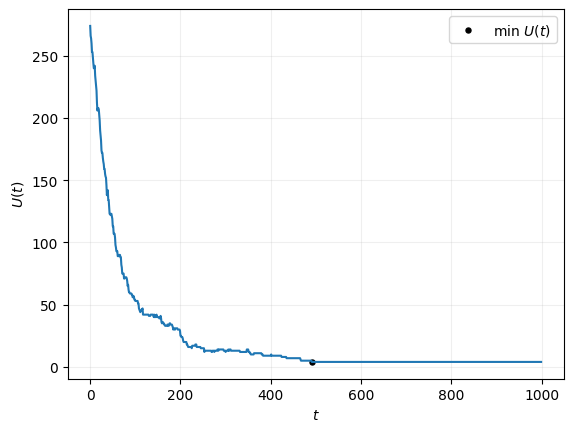


Solution of run #3


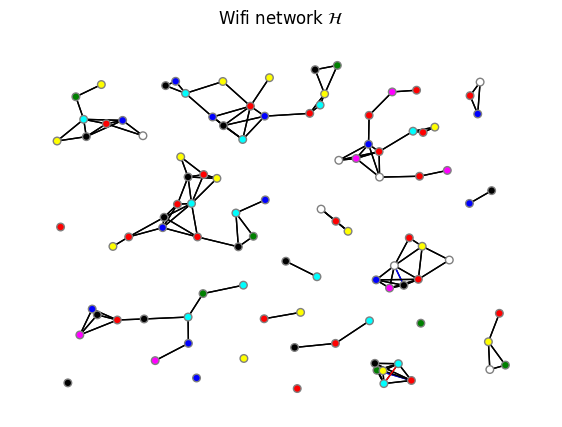

---------------- Run #4 ----------------
New min potential at time      1: 270.0
New min potential at time      2: 258.0
New min potential at time      3: 254.0
New min potential at time      5: 248.0
New min potential at time      7: 238.0
New min potential at time      8: 234.0
New min potential at time      9: 231.0
New min potential at time     10: 225.0
New min potential at time     11: 221.0
New min potential at time     13: 214.0
New min potential at time     15: 208.0
New min potential at time     16: 204.0
New min potential at time     17: 202.0
New min potential at time     19: 196.0
New min potential at time     20: 186.0
New min potential at time     23: 184.0
New min potential at time     24: 182.0
New min potential at time     26: 178.0
New min potential at time     27: 175.0
New min potential at time     28: 173.0
New min potential at time     32: 171.0
New min potential at time     33: 169.0
New min potential at time     34: 163.0
New min potential at time     35: 161.0

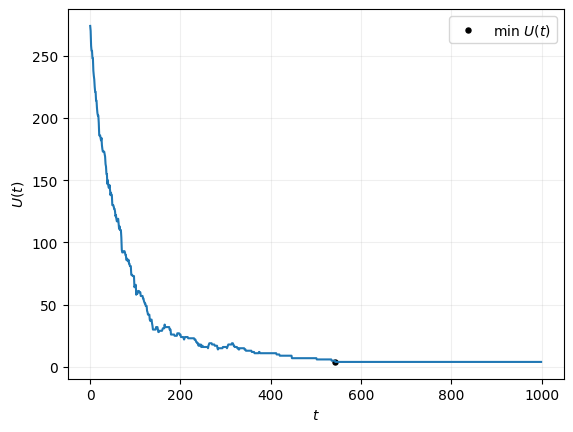


Solution of run #4


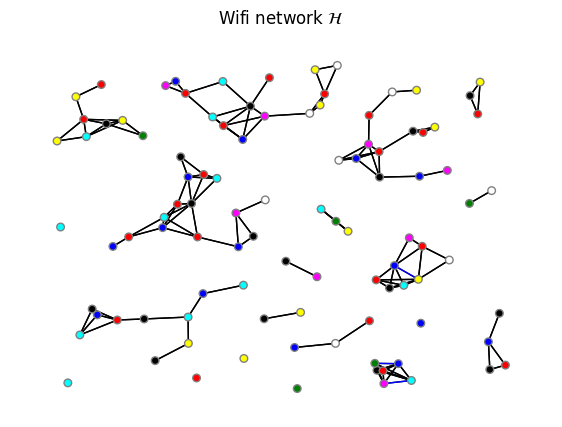

In [9]:
for n in range(1,5):
  print(f"---------------- Run #{n} ----------------")
  potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_t_over_100, cost_function_wifi, sim_time = 1000)
  plot_network_results(n, potential_in_time, min_t, min_u, min_net)


Complete graph of cardinality 2


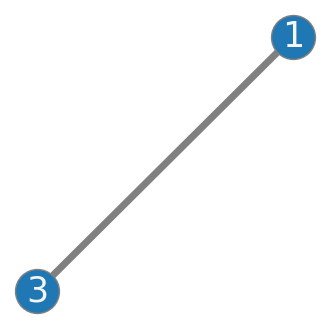


Complete graph of cardinality 3


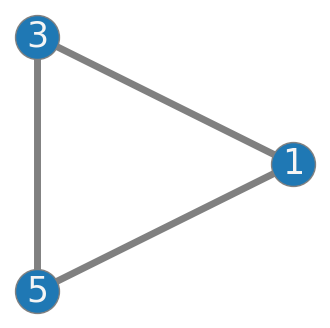


Complete graph of cardinality 4


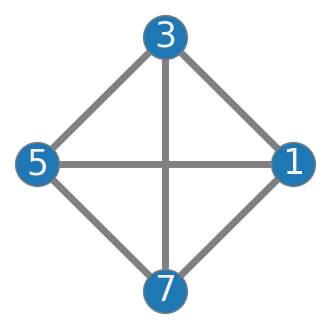


Complete graph of cardinality 5


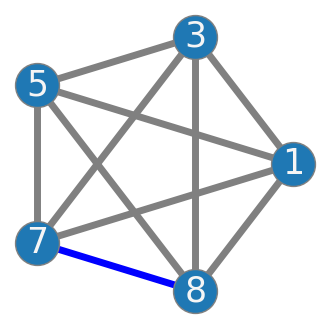


Complete graph of cardinality 6


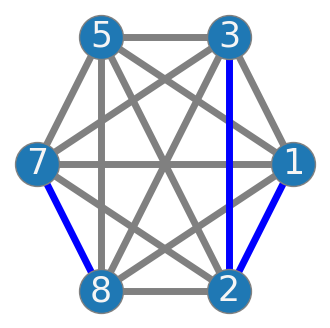

In [10]:
# Study of results, through relation of Complete graphs with Maximum Cliques - discussion in report

# optimal colors obtained by hand
test_colors = [1, 3, 5, 7, 8, 2]
for card in range(2, 6+1):
  print(f"\nComplete graph of cardinality {card}")
  test_labels = {k: test_colors[k] for k in range(card)}
  test_complete = nx.complete_graph(card)
  pos = nx.circular_layout(test_complete)
  fig, ax = plt.subplots(figsize=(4,4))
  nx.draw(test_complete, linewidths=1, edgecolors="grey", pos=pos, node_size=1000)
  nx.draw_networkx_labels(test_complete, pos, test_labels, font_size=25, font_color="whitesmoke")
  if card == 5:
    e_c = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','blue']
  elif card == 6:
    e_c = ['grey','grey','grey','grey','blue','grey','grey','grey','blue','grey','grey','grey','blue','grey','grey']
  else:
    e_c = ['grey' for e in test_complete.edges()]
  nx.draw_networkx_edges(test_complete, pos=pos, edge_color=e_c, width=5)
  # plt.savefig(f'test_complete_{card}.svg', format='svg', dpi=1200)
  plt.show()

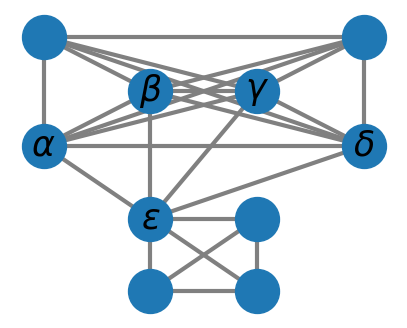


All max cliques on the test graph
[4, 0, 1, 2, 3, 5]
[6, 0, 1, 2, 3]
[6, 8, 9, 7]

New min potential at time      1: 36.0
New min potential at time      2: 26.0
New min potential at time      3: 24.0
New min potential at time      4: 18.0
New min potential at time      8: 17.0
New min potential at time     10: 15.0
New min potential at time     11: 14.0
New min potential at time     13: 11.0
New min potential at time     18: 10.0
New min potential at time     22: 9.0
New min potential at time     23: 8.0
New min potential at time     25: 7.0
New min potential at time     35: 6.0
New min potential at time     39: 5.0
New min potential at time     41: 3.0

Solution


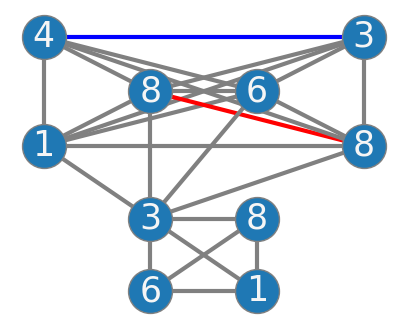


From this test we observed that even though there was a clique of size 6 (+3 cost), and another with size 5 (+1 cost), we still got min U(t)=3
since both cliques have an intersection, they share the burden of the potential cost
Hence the costs we discussed above, in case of intersection, become an UPPER bound for each max clique cardinality


In [11]:
# Study of results, through relation of Complete graphs with Maximum Cliques - discussion in report
# test interaction among non-zero potential max cliques (5, 6)

test_cliques = nx.complete_graph(6)
for i in range(6, 10):
  for j in range(i+1, 10):
    test_cliques.add_edge(i,j)

test_cliques.add_edge(0, 6)
test_cliques.add_edge(1, 6)
test_cliques.add_edge(2, 6)
test_cliques.add_edge(3, 6)

test_pos = [(0,5),(1,6.5),(2,6.5),(3,5),(0,8),(3,8),(1,3),(2,3),(1,1),(2,1)]

node_labels = {n: l for n, l in enumerate([r"$\alpha$", r"$\beta$", r"$\gamma$", r"$\delta$", "", "", r"$\epsilon$", "", "", ""])}
fig, ax = plt.subplots(figsize=(5,4))
nx.draw(test_cliques, pos=test_pos, node_size=1000)
nx.draw_networkx_edges(test_cliques, pos=test_pos, edge_color=["grey" for e in test_cliques.edges()], width=3)
nx.draw_networkx_labels(test_cliques, test_pos, node_labels, font_size=25)
# plt.savefig(f'test2_initial.svg', format='svg', dpi=1200)
plt.show()

print("\nAll max cliques on the test graph")
for clique in nx.find_cliques(test_cliques):
  print(clique)
print()

potential_in_time, min_u, min_t, min_colors, min_test_cliques = simulate_coloring_graph(test_cliques, list(C.keys()), eta_t_over_100, cost_function_wifi, sim_time = 500)

print("\nSolution")
cc = [C[c] for c in min_colors]
color_labels = {n: c for n, c in enumerate(min_colors)}
edge_color_map = {0:"grey", 1:"blue", 2:"red"}
edge_colors = [edge_color_map[cost_function_wifi(min_test_cliques.nodes()[i]["color"], min_test_cliques.nodes()[j]["color"])] for i, j in min_test_cliques.edges()]
fig, ax = plt.subplots(figsize=(5,4))
nx.draw(min_test_cliques, linewidths=1, edgecolors="grey", pos=test_pos, node_size=1000)
nx.draw_networkx_edges(min_test_cliques, pos=test_pos, edge_color=edge_colors, width=3)
nx.draw_networkx_labels(min_test_cliques, test_pos, color_labels, font_size=25, font_color="whitesmoke")
# plt.savefig(f'test2_solution.svg', format='svg', dpi=1200)
plt.show()

print("\nFrom this test we observed that even though there was a clique of size 6 (+3 cost), and another with size 5 (+1 cost), we still got min U(t)=3")
print("since both cliques have an intersection, they share the burden of the potential cost")
print("Hence the costs we discussed above, in case of intersection, become an UPPER bound for each max clique cardinality")

In [12]:
# Study of results, through relation of Complete graphs with Maximum Cliques - discussion in report

# all maximal cliques
max_clique_sizes = []
for clique in nx.find_cliques(network):
  max_clique_sizes.append(len(clique))

# max cadinality of the max cliques
max_size = max(max_clique_sizes)
print(f"The greatest cardinality of maximum clique in the network is {max_size}")

print("heuristically, we found that the upper bound of potential associated to each complete graph of different cardinalities are")
# "heuristically" in the cell above
potential_cost = {1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 3}
for cardinality in range(2, 7):
  print(f"For complete graphs of cardinality {cardinality}, the upper bound of potential is {potential_cost[cardinality]}")

print("\nIf we consider that max cliques without intersection inside the graph can increase the potential by the same quantity of a complete graph of same cardinality we obtain that")
print("The lower bound of potential of our network is:")
upper_bound_u = 0
for size in max_clique_sizes: upper_bound_u += potential_cost[size]
print(upper_bound_u)

The greatest cardinality of maximum clique in the network is 6
heuristically, we found that the upper bound of potential associated to each complete graph of different cardinalities are
For complete graphs of cardinality 2, the upper bound of potential is 0
For complete graphs of cardinality 3, the upper bound of potential is 0
For complete graphs of cardinality 4, the upper bound of potential is 0
For complete graphs of cardinality 5, the upper bound of potential is 1
For complete graphs of cardinality 6, the upper bound of potential is 3

If we consider that max cliques without intersection inside the graph can increase the potential by the same quantity of a complete graph of same cardinality we obtain that
The lower bound of potential of our network is:
4


#2(c)

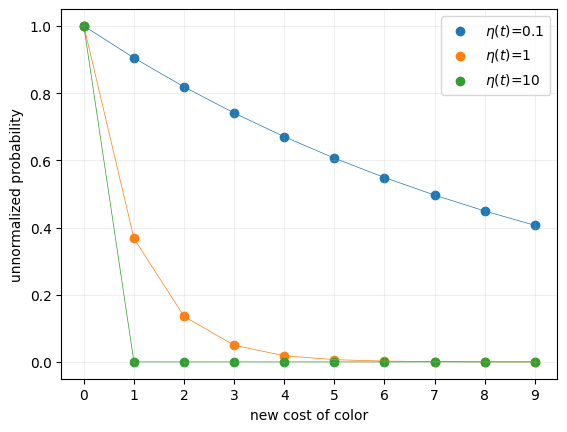

In [13]:
# study probability distribution given fixed etas
costs = np.arange(0, 10, 1)

for eta_ in [0.1, 1, 10]:
  prob = np.exp(-eta_ * costs)
  plt.plot(costs, prob, linewidth=0.5)
  plt.scatter(costs, prob, label=f"$\eta(t)$={eta_}")

plt.ylabel("unnormalized probability")
plt.xlabel("new cost of color")
plt.legend()
plt.xticks(np.arange(0, 10, 1))
plt.grid(alpha=0.2)
# plt.savefig('ex2_fixed_etas.svg', format='svg', dpi=1200)
plt.show()

New min potential at time      1: 270.0
New min potential at time      2: 262.0
New min potential at time      3: 254.0
New min potential at time      4: 250.0
New min potential at time      5: 244.0
New min potential at time      6: 242.0
New min potential at time      7: 240.0
New min potential at time      8: 239.0
New min potential at time      9: 235.0
New min potential at time     10: 225.0
New min potential at time     11: 223.0
New min potential at time     12: 221.0
New min potential at time     13: 218.0
New min potential at time     15: 212.0
New min potential at time     17: 208.0
New min potential at time     18: 207.0
New min potential at time     19: 199.0
New min potential at time     20: 197.0
New min potential at time     22: 196.0
New min potential at time     24: 192.0
New min potential at time     25: 188.0
New min potential at time     26: 186.0
New min potential at time     27: 185.0
New min potential at time     28: 179.0
New min potential at time     30: 175.0


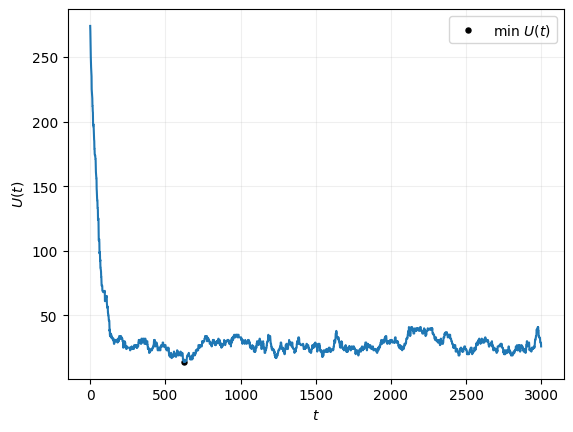


Solution of run #const_1_1


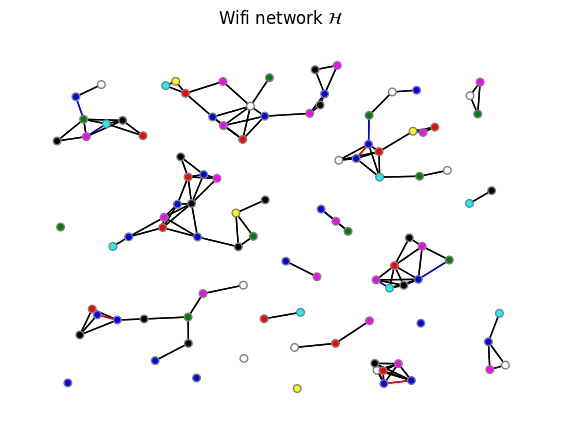

New min potential at time      2: 270.0
New min potential at time      3: 262.0
New min potential at time      4: 258.0
New min potential at time      5: 250.0
New min potential at time      6: 240.0
New min potential at time      7: 236.0
New min potential at time      9: 234.0
New min potential at time     10: 230.0
New min potential at time     12: 224.0
New min potential at time     13: 222.0
New min potential at time     15: 220.0
New min potential at time     16: 219.0
New min potential at time     17: 217.0
New min potential at time     18: 209.0
New min potential at time     19: 203.0
New min potential at time     20: 199.0
New min potential at time     21: 193.0
New min potential at time     22: 192.0
New min potential at time     23: 184.0
New min potential at time     24: 178.0
New min potential at time     25: 176.0
New min potential at time     27: 172.0
New min potential at time     28: 168.0
New min potential at time     34: 162.0
New min potential at time     35: 154.0


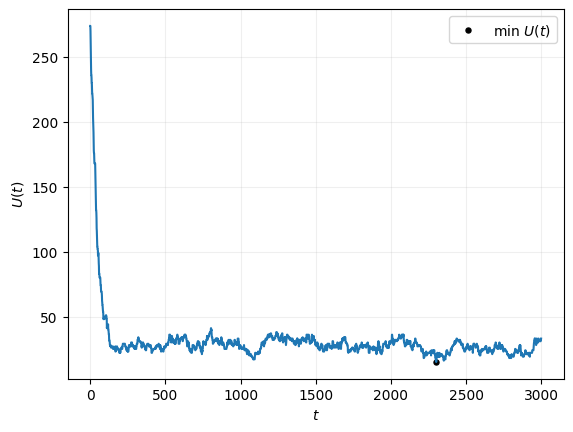


Solution of run #const_1_2


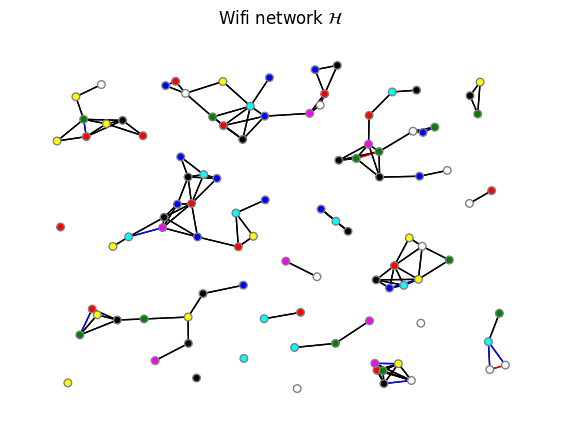

New min potential at time      2: 270.0
New min potential at time      3: 260.0
New min potential at time      4: 256.0
New min potential at time      5: 254.0
New min potential at time      6: 250.0
New min potential at time      7: 246.0
New min potential at time      9: 238.0
New min potential at time     10: 228.0
New min potential at time     11: 222.0
New min potential at time     12: 220.0
New min potential at time     14: 214.0
New min potential at time     15: 208.0
New min potential at time     16: 200.0
New min potential at time     17: 196.0
New min potential at time     18: 190.0
New min potential at time     19: 183.0
New min potential at time     21: 179.0
New min potential at time     22: 175.0
New min potential at time     23: 173.0
New min potential at time     24: 172.0
New min potential at time     25: 168.0
New min potential at time     26: 166.0
New min potential at time     27: 164.0
New min potential at time     28: 162.0
New min potential at time     29: 158.0


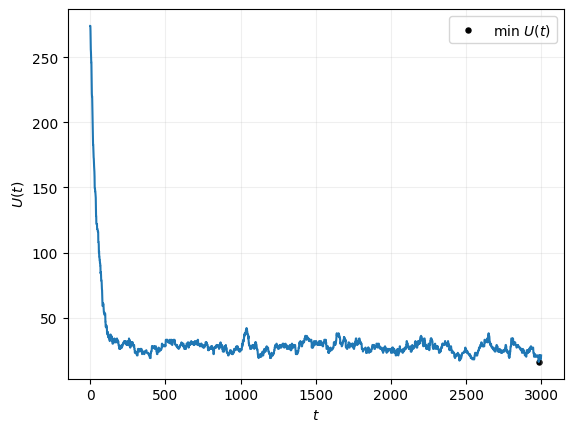


Solution of run #const_1_3


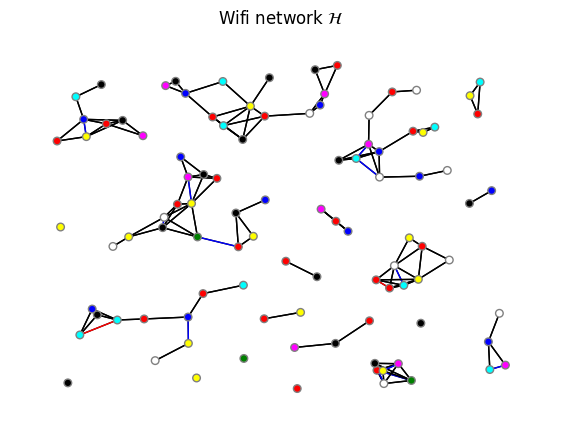

In [14]:
# Test eta(t) = 1
def eta_const_1(t):
  return 1
for n in range(1, 4):
  potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_const_1, cost_function_wifi, sim_time = 3000)
  plot_network_results(f"const_1_{n}", potential_in_time, min_t, min_u, min_net)

New min potential at time      1: 262.0
New min potential at time      2: 260.0
New min potential at time      3: 252.0
New min potential at time      4: 250.0
New min potential at time      5: 242.0
New min potential at time      6: 228.0
New min potential at time      7: 224.0
New min potential at time      8: 214.0
New min potential at time      9: 210.0
New min potential at time     10: 208.0
New min potential at time     11: 200.0
New min potential at time     12: 196.0
New min potential at time     13: 190.0
New min potential at time     14: 184.0
New min potential at time     15: 182.0
New min potential at time     16: 176.0
New min potential at time     17: 172.0
New min potential at time     18: 168.0
New min potential at time     19: 158.0
New min potential at time     21: 152.0
New min potential at time     22: 146.0
New min potential at time     23: 142.0
New min potential at time     24: 138.0
New min potential at time     26: 132.0
New min potential at time     27: 126.0


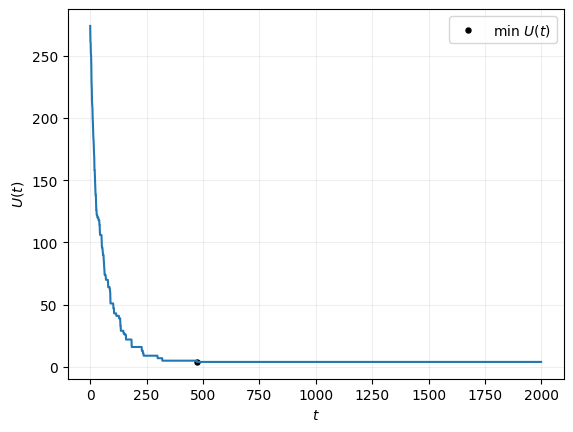


Solution of run #const_200_1


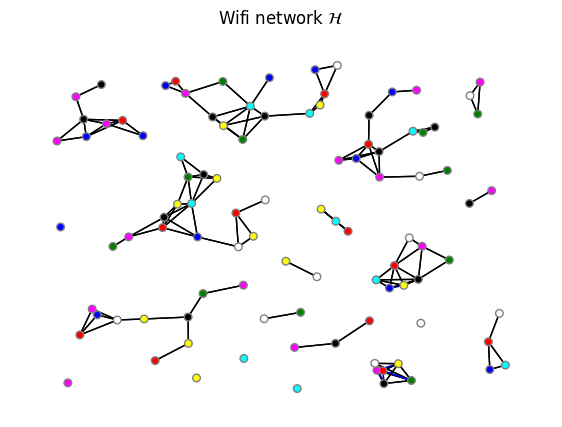

New min potential at time      1: 270.0
New min potential at time      2: 264.0
New min potential at time      3: 262.0
New min potential at time      4: 252.0
New min potential at time      5: 244.0
New min potential at time      6: 240.0
New min potential at time      7: 236.0
New min potential at time      8: 226.0
New min potential at time     10: 222.0
New min potential at time     11: 218.0
New min potential at time     12: 212.0
New min potential at time     13: 208.0
New min potential at time     15: 200.0
New min potential at time     16: 190.0
New min potential at time     18: 182.0
New min potential at time     19: 180.0
New min potential at time     20: 174.0
New min potential at time     21: 168.0
New min potential at time     23: 158.0
New min potential at time     24: 156.0
New min potential at time     25: 146.0
New min potential at time     26: 144.0
New min potential at time     28: 136.0
New min potential at time     30: 132.0
New min potential at time     31: 128.0


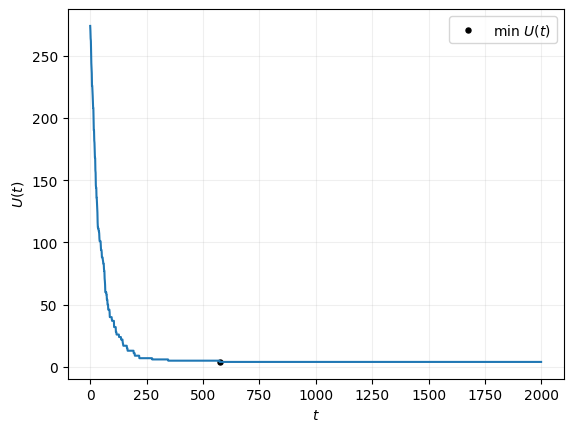


Solution of run #const_200_2


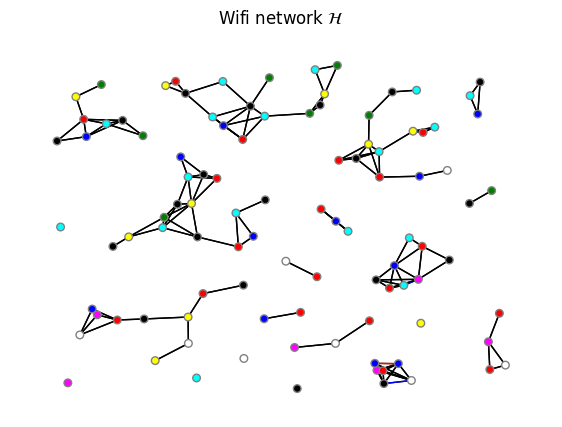

New min potential at time      1: 266.0
New min potential at time      2: 262.0
New min potential at time      3: 258.0
New min potential at time      4: 256.0
New min potential at time      5: 254.0
New min potential at time      6: 252.0
New min potential at time      7: 242.0
New min potential at time      9: 232.0
New min potential at time     10: 228.0
New min potential at time     11: 220.0
New min potential at time     12: 212.0
New min potential at time     13: 206.0
New min potential at time     14: 200.0
New min potential at time     15: 194.0
New min potential at time     16: 192.0
New min potential at time     19: 190.0
New min potential at time     20: 188.0
New min potential at time     22: 178.0
New min potential at time     23: 176.0
New min potential at time     24: 168.0
New min potential at time     25: 164.0
New min potential at time     26: 162.0
New min potential at time     29: 160.0
New min potential at time     31: 155.0
New min potential at time     33: 151.0


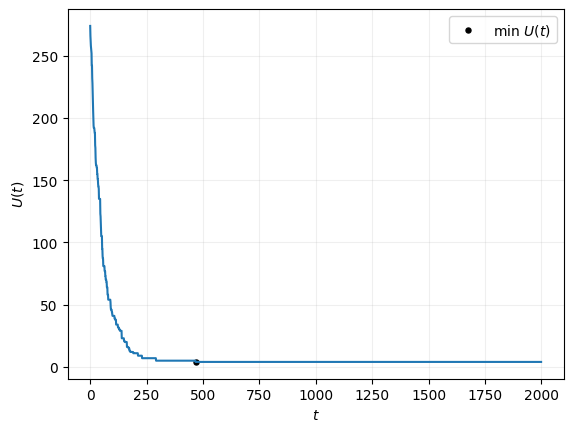


Solution of run #const_200_3


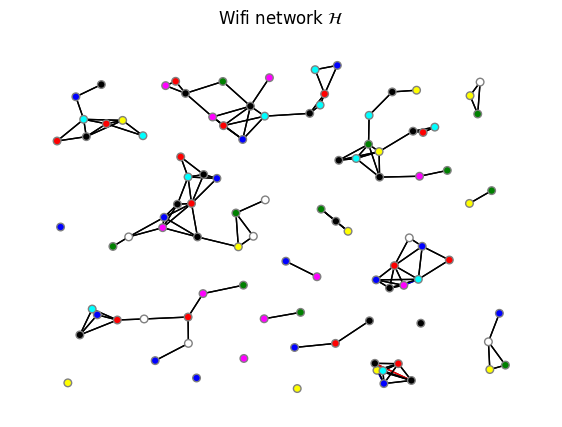

In [15]:
def eta_const_200(t):
  return 200
for n in range(1, 4):
  potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_const_200, cost_function_wifi, sim_time = 2000)
  plot_network_results(f"const_200_{n}", potential_in_time, min_t, min_u, min_net)

New min potential at time      1: 264.0
New min potential at time      2: 262.0
New min potential at time      3: 254.0
New min potential at time      4: 248.0
New min potential at time      5: 236.0
New min potential at time      6: 234.0
New min potential at time      7: 228.0
New min potential at time      8: 220.0
New min potential at time      9: 218.0
New min potential at time     11: 214.0
New min potential at time     12: 202.0
New min potential at time     13: 194.0
New min potential at time     14: 190.0
New min potential at time     15: 184.0
New min potential at time     17: 176.0
New min potential at time     18: 170.0
New min potential at time     19: 166.0
New min potential at time     20: 156.0
New min potential at time     22: 154.0
New min potential at time     24: 144.0
New min potential at time     25: 140.0
New min potential at time     27: 136.0
New min potential at time     29: 130.0
New min potential at time     30: 128.0
New min potential at time     34: 122.0


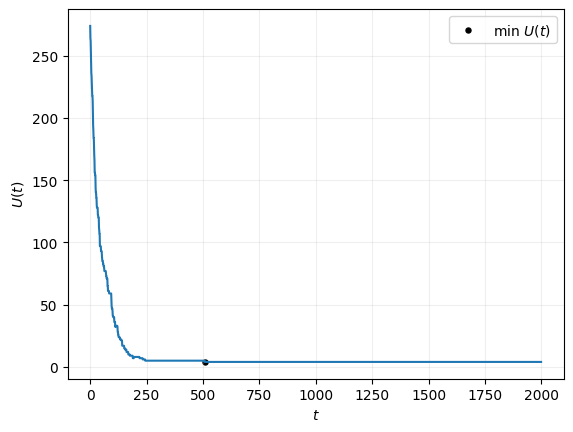


Solution of run #log_1


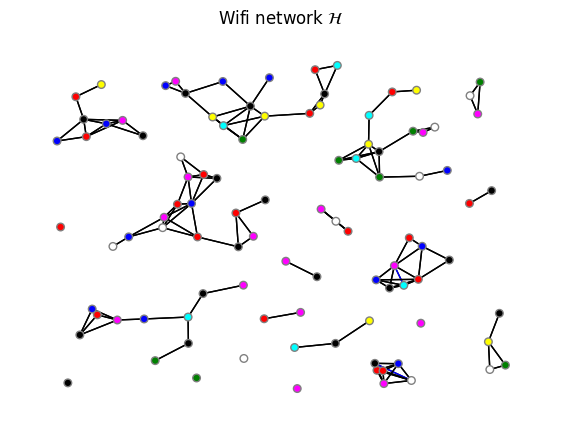

New min potential at time      2: 272.0
New min potential at time      3: 264.0
New min potential at time      4: 260.0
New min potential at time      5: 256.0
New min potential at time      6: 248.0
New min potential at time      7: 246.0
New min potential at time      8: 242.0
New min potential at time      9: 236.0
New min potential at time     10: 228.0
New min potential at time     11: 222.0
New min potential at time     12: 216.0
New min potential at time     13: 212.0
New min potential at time     14: 208.0
New min potential at time     15: 202.0
New min potential at time     16: 198.0
New min potential at time     17: 190.0
New min potential at time     18: 182.0
New min potential at time     19: 176.0
New min potential at time     20: 172.0
New min potential at time     21: 166.0
New min potential at time     22: 160.0
New min potential at time     23: 154.0
New min potential at time     24: 150.0
New min potential at time     25: 144.0
New min potential at time     27: 138.0


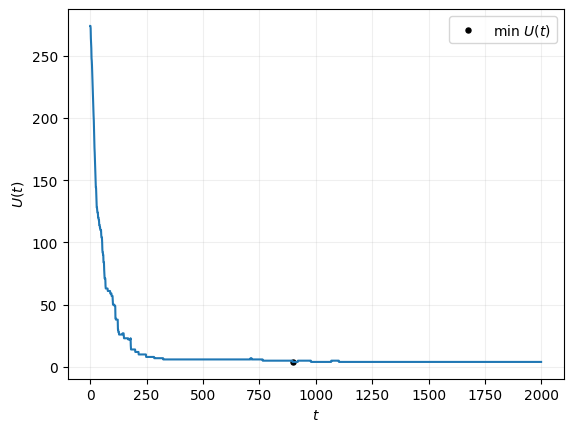


Solution of run #log_2


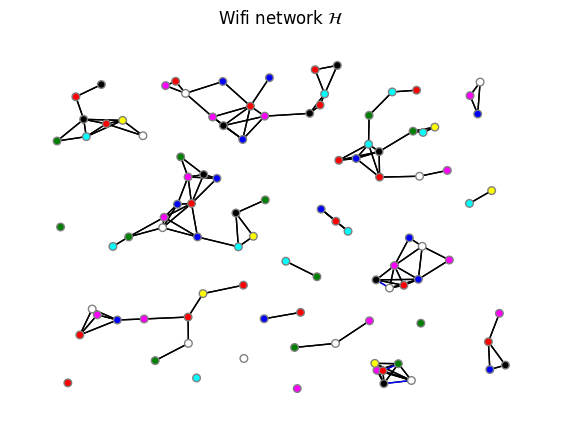

New min potential at time      1: 272.0
New min potential at time      3: 264.0
New min potential at time      5: 258.0
New min potential at time      6: 252.0
New min potential at time      7: 250.0
New min potential at time      9: 238.0
New min potential at time     10: 228.0
New min potential at time     11: 224.0
New min potential at time     12: 222.0
New min potential at time     13: 214.0
New min potential at time     14: 210.0
New min potential at time     15: 208.0
New min potential at time     16: 204.0
New min potential at time     17: 200.0
New min potential at time     19: 196.0
New min potential at time     20: 193.0
New min potential at time     23: 191.0
New min potential at time     25: 181.0
New min potential at time     26: 173.0
New min potential at time     28: 171.0
New min potential at time     30: 165.0
New min potential at time     32: 163.0
New min potential at time     33: 159.0
New min potential at time     37: 158.0
New min potential at time     38: 156.0


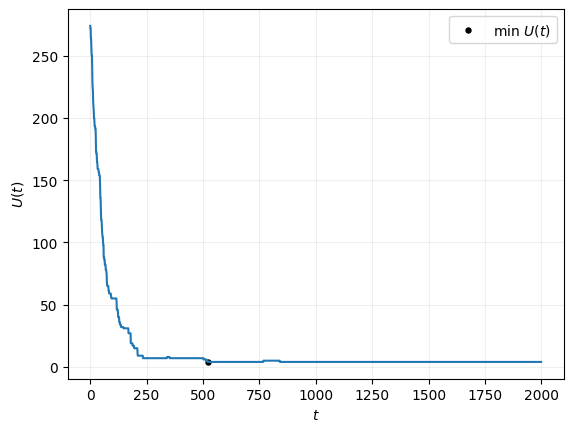


Solution of run #log_3


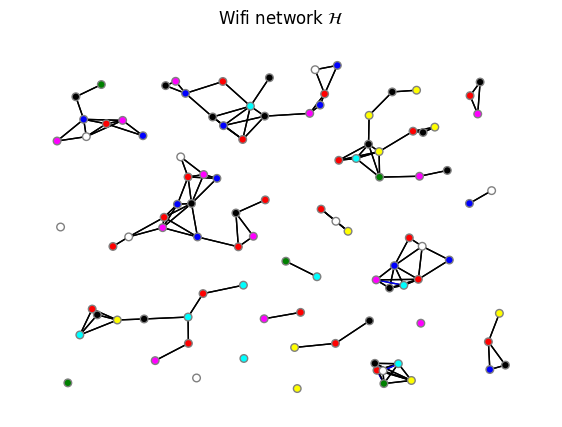

In [16]:
def eta_log(t):
  return np.log(t)
for n in range(1, 4):
  potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_log, cost_function_wifi, sim_time = 2000)
  plot_network_results(f"log_{n}", potential_in_time, min_t, min_u, min_net)

New min potential at time      1: 270.0
New min potential at time      2: 268.0
New min potential at time      5: 264.0
New min potential at time      6: 262.0
New min potential at time      7: 258.0
New min potential at time      9: 250.0
New min potential at time     10: 246.0
New min potential at time     12: 238.0
New min potential at time     14: 228.0
New min potential at time     15: 226.0
New min potential at time     16: 224.0
New min potential at time     17: 216.0
New min potential at time     18: 212.0
New min potential at time     19: 210.0
New min potential at time     20: 204.0
New min potential at time     22: 200.0
New min potential at time     23: 194.0
New min potential at time     24: 192.0
New min potential at time     25: 188.0
New min potential at time     26: 182.0
New min potential at time     27: 176.0
New min potential at time     29: 171.0
New min potential at time     32: 170.0
New min potential at time     33: 166.0
New min potential at time     34: 162.0


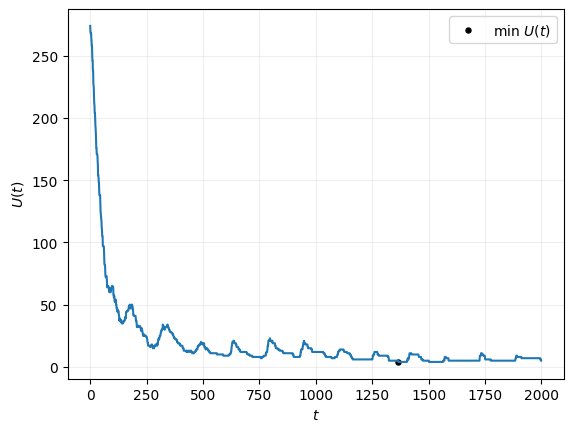


Solution of run #sin_1gt2


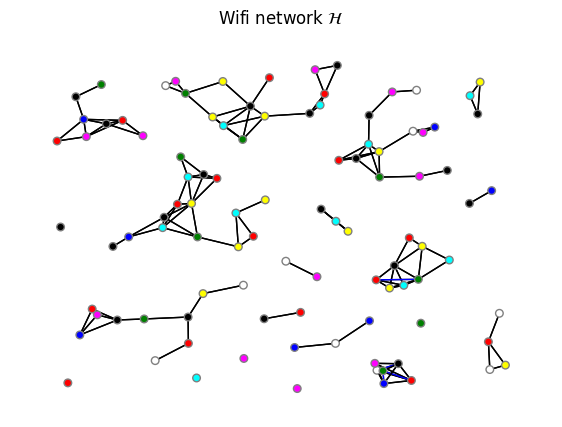

In [17]:
# tau1 > tau2
def eta_sin(t):
  tau1 = 100
  tau2 = 50
  return np.abs(np.sin(t/tau2))*t/tau1

potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_sin, cost_function_wifi, sim_time = 2000)
plot_network_results(f"sin_1gt2", potential_in_time, min_t, min_u, min_net)

New min potential at time      1: 270.0
New min potential at time      2: 268.0
New min potential at time      4: 263.0
New min potential at time      5: 259.0
New min potential at time      6: 248.0
New min potential at time      8: 244.0
New min potential at time      9: 242.0
New min potential at time     10: 238.0
New min potential at time     11: 234.0
New min potential at time     12: 232.0
New min potential at time     14: 229.0
New min potential at time     18: 224.0
New min potential at time     20: 214.0
New min potential at time     21: 210.0
New min potential at time     22: 206.0
New min potential at time     23: 200.0
New min potential at time     24: 196.0
New min potential at time     27: 188.0
New min potential at time     30: 182.0
New min potential at time     31: 178.0
New min potential at time     32: 172.0
New min potential at time     33: 165.0
New min potential at time     34: 163.0
New min potential at time     36: 157.0
New min potential at time     37: 155.0


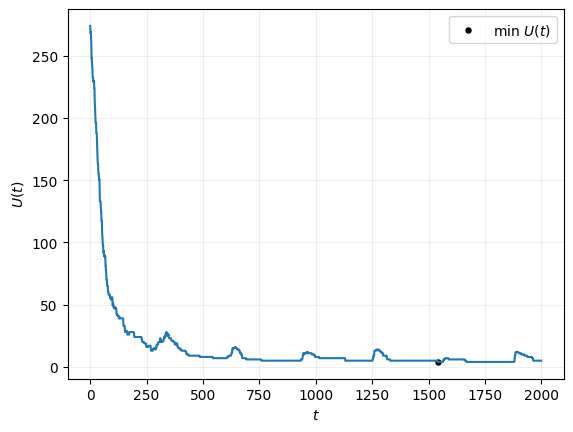


Solution of run #sin_1lt2


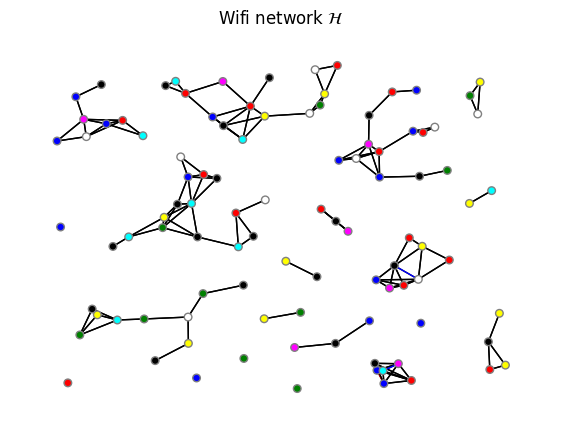

In [18]:
# tau1 < tau2
def eta_sin(t):
  tau1 = 50
  tau2 = 100
  return np.abs(np.sin(t/tau2))*t/tau1

potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_sin, cost_function_wifi, sim_time = 2000)
plot_network_results(f"sin_1lt2", potential_in_time, min_t, min_u, min_net)

New min potential at time      1: 268.0
New min potential at time      2: 256.0
New min potential at time      3: 253.0
New min potential at time      4: 248.0
New min potential at time      5: 244.0
New min potential at time      7: 232.0
New min potential at time      8: 222.0
New min potential at time      9: 214.0
New min potential at time     11: 210.0
New min potential at time     13: 208.0
New min potential at time     14: 207.0
New min potential at time     16: 201.0
New min potential at time     17: 199.0
New min potential at time     19: 189.0
New min potential at time     21: 187.0
New min potential at time     22: 181.0
New min potential at time     24: 171.0
New min potential at time     26: 161.0
New min potential at time     27: 159.0
New min potential at time     28: 157.0
New min potential at time     29: 152.0
New min potential at time     30: 148.0
New min potential at time     31: 144.0
New min potential at time     32: 143.0
New min potential at time     35: 142.0


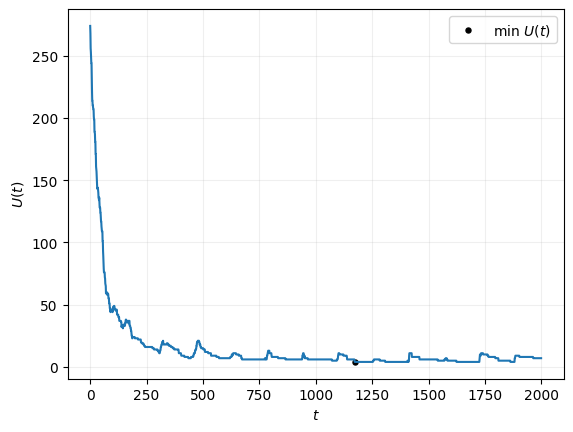


Solution of run #sin_1eq2


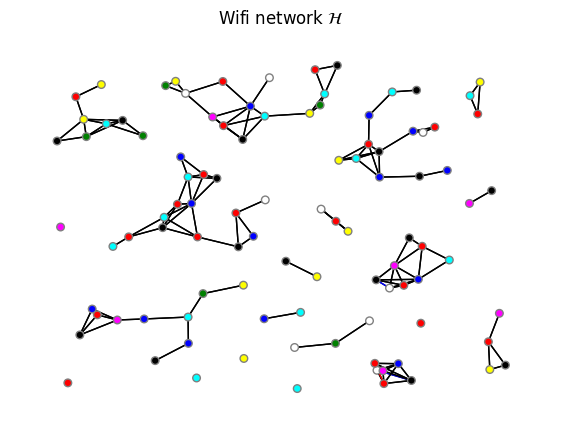

In [19]:
# tau1 = tau2
def eta_sin(t):
  tau1 = 50
  tau2 = 50
  return np.abs(np.sin(t/tau2))*t/tau1

potential_in_time, min_u, min_t, min_colors, min_net = simulate_coloring_graph(network, list(C.keys()), eta_sin, cost_function_wifi, sim_time = 2000)
plot_network_results(f"sin_1eq2", potential_in_time, min_t, min_u, min_net)